In [4]:
#                                              Cancer Prediction System



# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as s
from matplotlib import style
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as p
from sklearn.preprocessing import StandardScaler, LabelEncoder
#optimum parameter choosing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Data Set

# Reading the data csv file

Data = pd.read_csv("data.csv") 

# Making a copy of original data and 

ds = Data.copy()
print(ds)
print(Data.head(2))
print(Data.info())
print(Data.describe())

# Print the whole data from the cvc file

print(Data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [7]:
# Print the shape of the file

display(Data.shape)

(569, 32)

In [8]:
# Printing the number of B and M

display(Data["diagnosis"].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
# Print the the datatype of the columns

display(Data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Creating X variable with out diagnosis column

x = Data.drop(labels= "diagnosis" , axis= 1)
x 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# Creating Y variable (diagnosis)

y = Data["diagnosis"]
y 

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
# Extracting all column names 

col = x. columns
col

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Checking for null values 

x.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# Normalization 

ds_norm = (x- x.mean()) / (x.max()- x.min())
ds_norm= pd.concat ([ds_norm,y], axis =1 )
ds_norm

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.032311,0.351778,0.104848,0.345733,0.349570,0.132163,0.035455,0.363404,0.447221,-0.043242,...,0.019264,0.293036,0.281758,0.056999,-0.041685,0.110632,0.367676,-0.165731,-0.083929,M
565,-0.032311,0.284098,0.303022,0.271101,0.257099,0.012997,-0.002886,0.129336,0.243493,-0.030110,...,0.335095,0.237755,0.209009,-0.104131,-0.060216,0.039386,0.165614,-0.064805,-0.115281,M
566,-0.032310,0.117029,0.297273,0.112853,0.086198,-0.106620,-0.006260,0.008694,0.020382,-0.111929,...,0.225021,0.096812,0.059825,-0.121961,0.053492,0.054402,0.093449,-0.134586,-0.037687,M
567,-0.032310,0.306342,0.339545,0.332603,0.258796,0.193552,0.529596,0.615278,0.512330,0.295647,...,0.366279,0.385173,0.231129,0.215488,0.595546,0.532357,0.516817,0.233835,0.262719,M


In [15]:
# Printing Co relation 

ds.drop('diagnosis',axis =1).drop('id',axis =1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

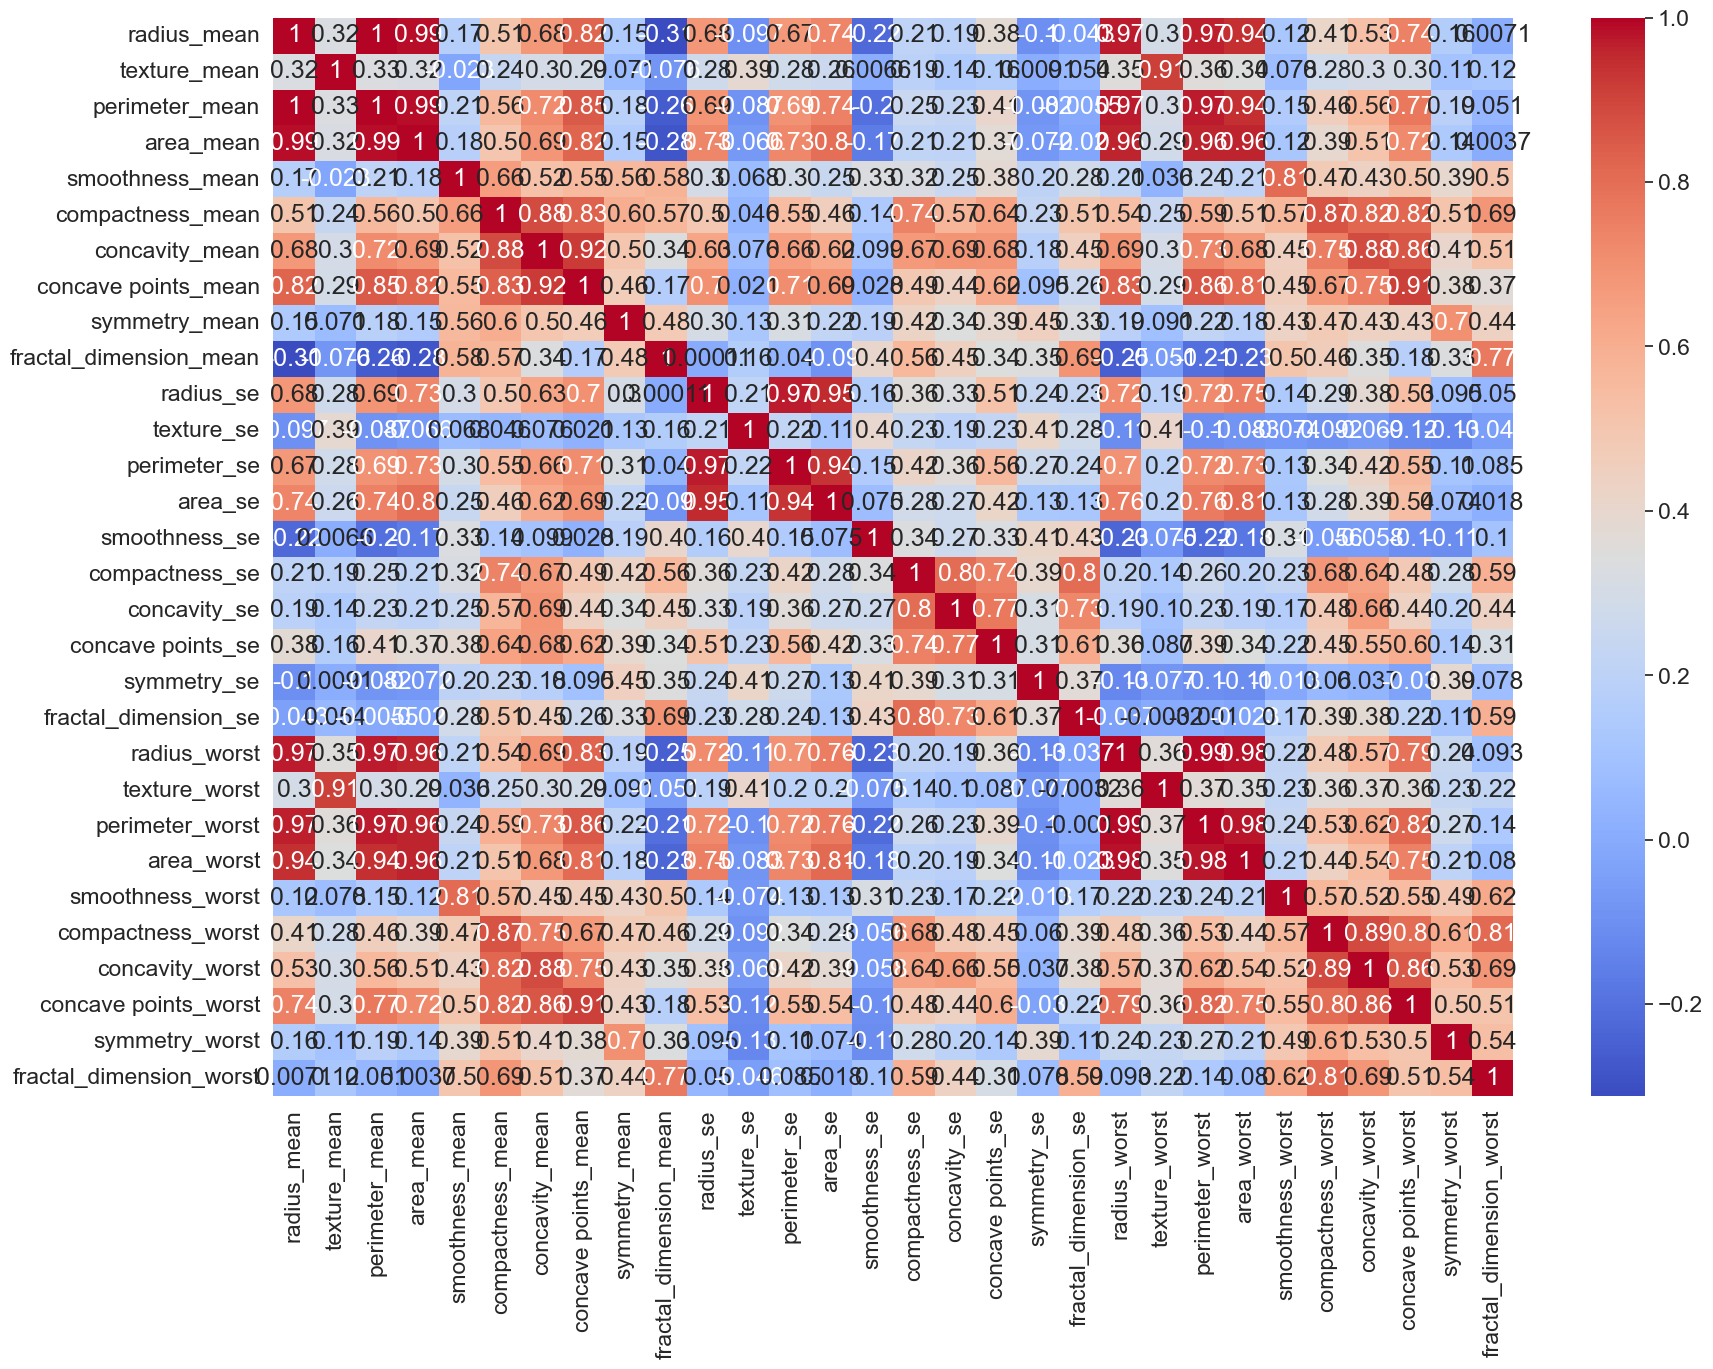

In [16]:
# Heat map with co relation 

plt.rcParams['figure.figsize']=(20,14)
s.set(font_scale=1.5)

# In co relation 1 is the highest and -1 is lowest

s.heatmap (ds.drop('diagnosis',axis =1).drop('id',axis =1).corr(),cmap = 'coolwarm',annot = True)

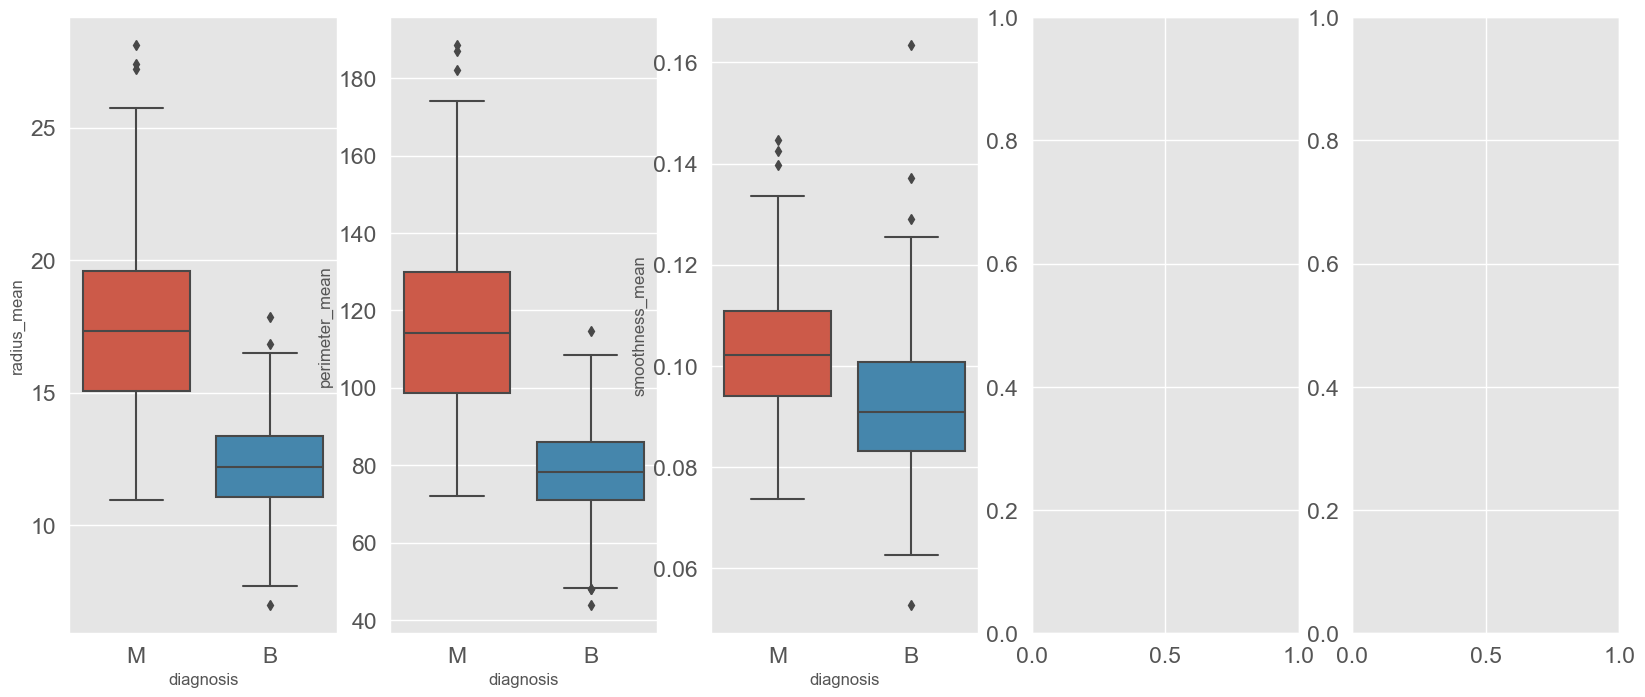

In [28]:
#ds = Data.copy()
#style.use("ggplot")

# Creating box plot for diagnosis columns in respect to M and B

#plt.rcParams['figure.figsize']=(20,8)
#f , (ax1 , ax2 , ax3 , ax4 , ax5) = plt.subplots(1 , 5)

#s.boxplot("diagnosis" , y= "radius_mean" , data= ds , ax= ax1)
#s.boxplot("diagnosis" , y= "perimeter_mean" , data= ds ,ax= ax2)
#s.boxplot("diagnosis" , y= "smoothness_mean" , data= ds ,ax= ax3)
#s.boxplot("diagnosis" , y= "symmetry_mean" , data= ds ,ax= ax4)
#s.boxplot("diagnosis" , y= "concavity_mean" , data= ds , ax= ax5)
#f .tight_layout()

#plt.show()

plt.rcParams['figure.figsize'] = (20, 8)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

# Corrected the boxplot function calls by ensuring the parameters are passed correctly
s.boxplot(x="diagnosis", y="radius_mean", data=ds, ax=ax1)  # Use 'x' for the categorical variable
s.boxplot(x="diagnosis", y="perimeter_mean", data=ds, ax=ax2)
s.boxplot(x="diagnosis", y="smoothness_mean", data=ds, ax=ax3)

# Add additional boxplot calls for ax4 and ax5 as needed
plt.show()  # Display the plots

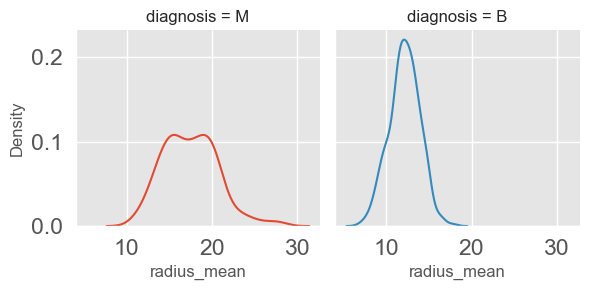

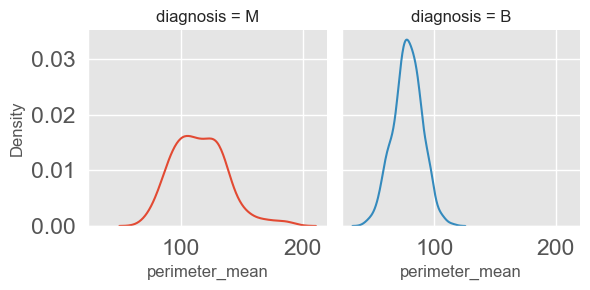

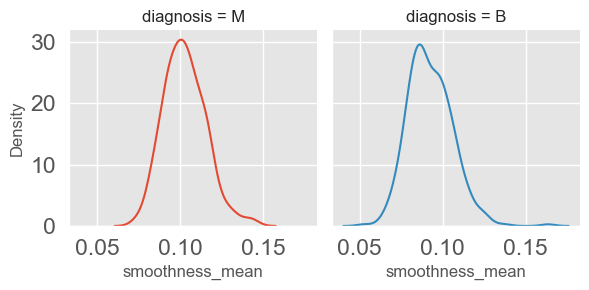

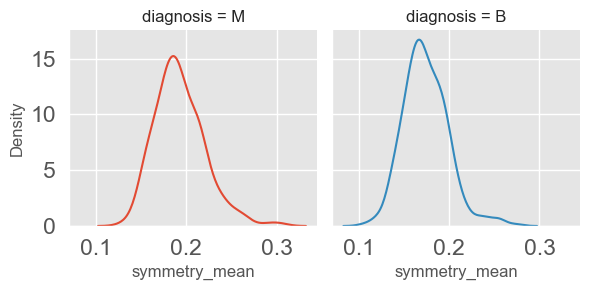

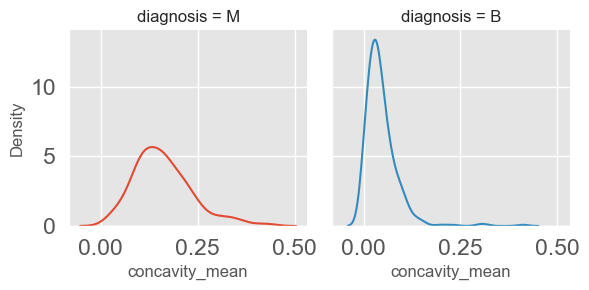

In [30]:
g = sns.FacetGrid(ds , col = "diagnosis" , hue = "diagnosis")
g.map(sns.distplot , "radius_mean" , hist = False)
g = sns.FacetGrid(ds , col = "diagnosis" , hue = "diagnosis")
g.map(sns.distplot , "perimeter_mean" , hist = False)
g = sns.FacetGrid(ds , col = "diagnosis" , hue = "diagnosis")
g.map(sns.distplot , "smoothness_mean" , hist = False)
g = sns.FacetGrid(ds , col = "diagnosis" , hue = "diagnosis")
g.map(sns.distplot , "symmetry_mean" , hist = False)
g = sns.FacetGrid(ds , col = "diagnosis" , hue = "diagnosis")
g.map(sns.distplot , "concavity_mean" , hist = False)

plt.show()

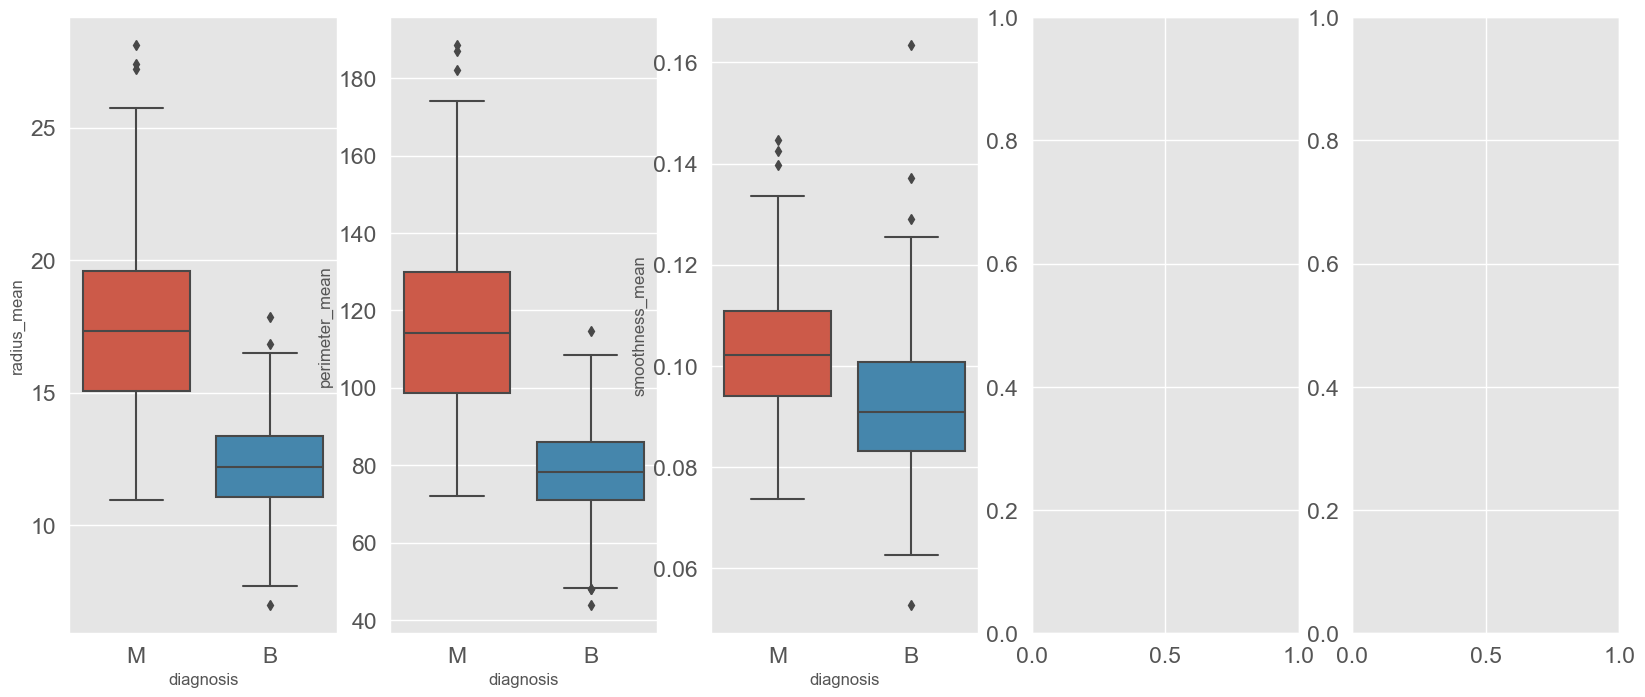

In [43]:
plt.rcParams['figure.figsize'] = (20, 8)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

# Corrected the boxplot function calls by ensuring the parameters are passed correctly
s.boxplot(x="diagnosis", y="radius_mean", data=ds, ax=ax1)  # Use 'x' for the categorical variable
s.boxplot(x="diagnosis", y="perimeter_mean", data=ds, ax=ax2)
s.boxplot(x="diagnosis", y="smoothness_mean", data=ds, ax=ax3)

# Add additional boxplot calls for ax4 and ax5 as needed
plt.show()  # Display the plots

In [45]:
x_norm = ds_norm.drop(labels= "diagnosis" , axis= 1)
y_norm = ds_norm["diagnosis"]
columns = x_norm.columns

print(x_norm)
print(y_norm)
print(columns)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   -0.032403     0.182815     -0.301307        0.213053   0.146813   
1   -0.032403     0.304923     -0.051392        0.282848   0.284671   
2    0.059177     0.263274      0.066295        0.262808   0.232497   
3    0.059229    -0.128132      0.036874       -0.099434  -0.114014   
4    0.059241     0.291671     -0.167388        0.298051   0.272369   
..        ...          ...           ...             ...        ...   
564 -0.032311     0.351778      0.104848        0.345733   0.349570   
565 -0.032311     0.284098      0.303022        0.271101   0.257099   
566 -0.032310     0.117029      0.297273        0.112853   0.086198   
567 -0.032310     0.306342      0.339545        0.332603   0.258796   
568 -0.033226    -0.301353      0.177557       -0.304395  -0.201013   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.198968          0.531437        0.495081             0

In [46]:
# Implementing Label Encoding function

lb = LabelEncoder()
y_norm = lb.fit_transform(y_norm)
display(y_norm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [47]:
# Implementing SVC module

x_train , x_test , y_train , y_test = train_test_split(x_norm , y_norm , test_size= 0.2 , random_state= 10)

param = { 'C': [0.1,1,100,1000],'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100] }

grid = GridSearchCV(estimator= SVC() , param_grid = param , cv = 5 , scoring= "accuracy" , verbose= 1 , n_jobs= -1)

grid_result = grid.fit(x_train , y_train)

best_param = grid_result.best_params_

predict = grid_result.predict(x_test)

confu = confusion_matrix(y_test , predict)

print("Grid Result",grid_result)
print("Best Param",best_param)
print("Predict",predict)
print ('Accuracy Score',(accuracy_score(y_test,predict)))
print("Confusion",confu)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid Result GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10,
                                   100]},
             scoring='accuracy', verbose=1)
Best Param {'C': 1, 'gamma': 1}
Predict [1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Accuracy Score 0.9736842105263158
Confusion [[72  3]
 [ 0 39]]


In [48]:
# RandomForestClassifier

x_train , x_test , y_train , y_test = train_test_split(x_norm , y_norm , test_size = 0.2 , random_state= 10)

param = {'n_estimators': [100,500,1000,2000]}

grid = GridSearchCV(estimator= RandomForestClassifier() , param_grid= param , cv = 10 , scoring= "accuracy" , verbose= 1 , n_jobs= -1)

grid_result = grid.fit(x_train , y_train)
best_param = grid_result.best_params_
prediction = grid_result.predict(x_test)
confu = confusion_matrix(y_test , prediction)

print("Grid Result",grid_result)
print("Best Param",best_param)
print("Predict",predict)
print ('Accuracy Score',(accuracy_score(y_test,predict)))
print("Confusion",confu)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid Result GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000, 2000]},
             scoring='accuracy', verbose=1)
Best Param {'n_estimators': 500}
Predict [1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Accuracy Score 0.9736842105263158
Confusion [[73  2]
 [ 0 39]]


In [49]:
indices = sorted(ds)
data1 = pd.DataFrame(indices)
print(data1)

                          0
0                 area_mean
1                   area_se
2                area_worst
3          compactness_mean
4            compactness_se
5         compactness_worst
6       concave points_mean
7         concave points_se
8      concave points_worst
9            concavity_mean
10             concavity_se
11          concavity_worst
12                diagnosis
13   fractal_dimension_mean
14     fractal_dimension_se
15  fractal_dimension_worst
16                       id
17           perimeter_mean
18             perimeter_se
19          perimeter_worst
20              radius_mean
21                radius_se
22             radius_worst
23          smoothness_mean
24            smoothness_se
25         smoothness_worst
26            symmetry_mean
27              symmetry_se
28           symmetry_worst
29             texture_mean
30               texture_se
31            texture_worst


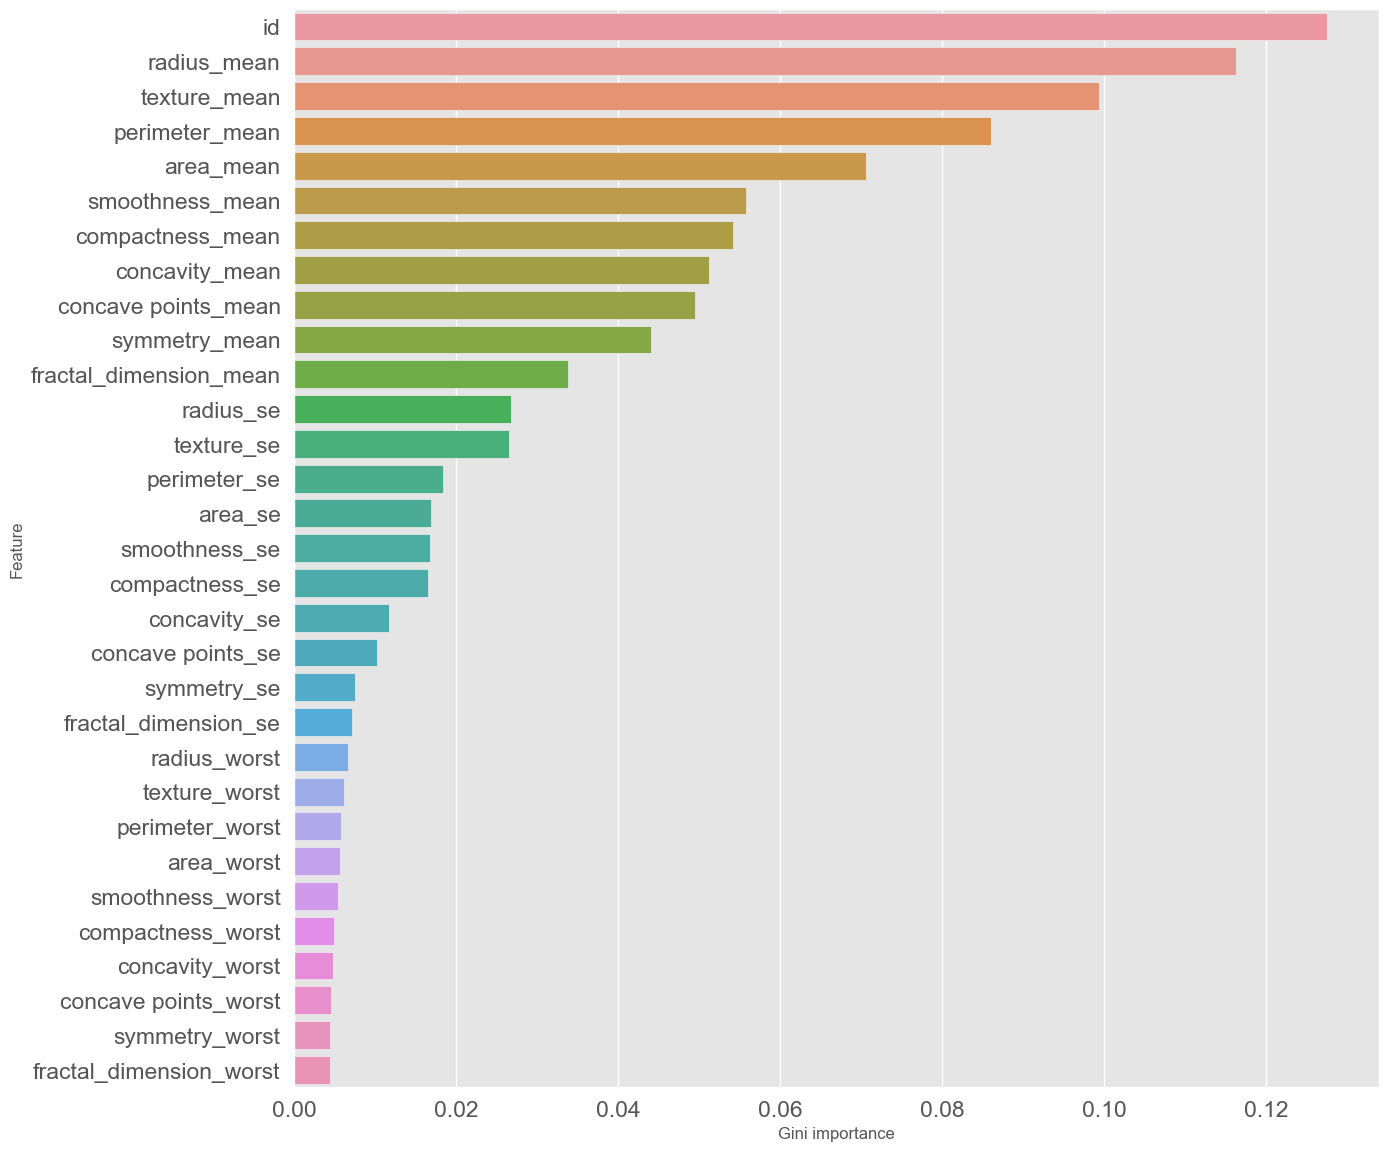

In [50]:
# seaborn bargraph using indexes

x_train,x_test, y_train,y_test = train_test_split (x_norm,y_norm,test_size = 0.5 , random_state= 10)

forest = RandomForestClassifier(n_estimators= 550)
fit = forest.fit(x_train , y_train)

important = forest.feature_importances_
indices = np.argsort(important)[::-1]

imp = pd.DataFrame({"Feature": list(x) , "Gini importance": important[indices]})
plt.rcParams["figure.figsize"] = (14 , 14)

sns.barplot(x = "Gini importance" , y = "Feature" , data= imp)

plt.show()

In [51]:
# data analyze using xgboost library

x_train , x_test , y_train , y_test = train_test_split(x_norm , y_norm , test_size= 0.5 , random_state= 10)

param = {'n_estimators': [100,500,1000,2000]}

grid = GridSearchCV(estimator= XGBClassifier(), param_grid = param , cv = 10 , verbose= 1 , n_jobs= -1)

grid_result = grid.fit(x_train , y_train)
best_param = grid_result.best_params_
prediction = grid_result.predict(x_test)
confu = confusion_matrix(y_test , prediction)
accuracy = grid_result.score(x_test , y_test)

print("Grid Result",grid_result)
print("Best Param",best_param)
print("Predict",predict)
print ('Accuracy Score',accuracy)
print("Confusion",confu)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid Result GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
   

In [68]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def simple_smote(X, y, N=100, k=5):
    """
    Simple implementation of SMOTE.
    
    Parameters:
    X: np.ndarray or pd.DataFrame - Feature set
    y: np.ndarray or pd.Series - Target labels
    N: int - Percentage of new samples to create
    k: int - Number of nearest neighbors to use
    
    Returns:
    X_res: np.ndarray - Resampled feature set
    y_res: np.ndarray - Resampled target labels
    """
    # Separate the minority class
    minority_class = np.unique(y)[1]  # Assuming the second class is the minority
    X_minority = X[y == minority_class]
    
    # Fit nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_minority)
    
    # Generate synthetic samples
    synthetic_samples = []
    for i in range(len(X_minority)):
        # Find k nearest neighbors
        neighbors = nbrs.kneighbors(X_minority[i].reshape(1, -1), return_distance=False)
        for _ in range(N // 100):  # Create N% of new samples
            # Randomly select one of the neighbors
            random_neighbor = X_minority[neighbors[0][np.random.randint(0, k)]]
            # Create a synthetic sample
            synthetic_sample = X_minority[i] + np.random.rand() * (random_neighbor - X_minority[i])
            synthetic_samples.append(synthetic_sample)
    
    # Combine original and synthetic samples
    X_res = np.vstack((X, np.array(synthetic_samples)))
    y_res = np.hstack((y, np.array([minority_class] * len(synthetic_samples))))
    
    return X_res, y_res

# Example usage
# Assuming ds is your DataFrame and 'diagnosis' is the target column
x_norm = ds.drop(columns=['diagnosis']).values  # Features
y_norm = ds['diagnosis'].values  # Target labels

# Count the original classes
print(ds['diagnosis'].value_counts())

# Apply the custom SMOTE function
x_res, y_res = simple_smote(x_norm, y_norm, N=100, k=5)

# Print the resampled target labels
print(pd.Series(y_res).value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
M    424
B    357
Name: count, dtype: int64


In [69]:
# Using RandomForest in imblearn

x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size= 0.5 , random_state= 10)
param = {'n_estimators': [100,500,1000,2000]}

grid = GridSearchCV(estimator= RandomForestClassifier() , param_grid= param , cv = 10 , verbose= 1 , n_jobs= -1)

grid_result = grid.fit(x_train , y_train)
best_param = grid_result.best_params_
prediction = grid_result.predict(x_test)
confu = confusion_matrix(y_test , prediction)
accuracy = grid_result.score(x_test , y_test)

print("Grid Result",grid_result)
print("Best Param",best_param)
print("Predict",predict)
print ('Accuracy Score',accuracy)
print("Confusion",confu)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid Result GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=1)
Best Param {'n_estimators': 500}
Predict [1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Accuracy Score 0.9744245524296675
Confusion [[172   6]
 [  4 209]]


In [73]:
# Use xgboost in imbleran

x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size= 0.5 , random_state= 10)
param = {'n_estimators': [100,500,1000,2000]}

grid = GridSearchCV(estimator= XGBClassifier() , param_grid= param , cv = 10 , verbose= 1 , n_jobs= -1)
# Check for NaN values
print("NaN values in x_train:")
print(np.isnan(x_train).sum())
print("NaN values in y_train:")
print(np.isnan(y_train).sum())

# Check data types
print("Data types in x_train:")
print(pd.DataFrame(x_train).dtypes)
print("Data type in y_train:")
print(pd.Series(y_train).dtype)
grid_result = grid.fit(x_train , y_train)
best_param = grid_result.best_params_
prediction = grid_result.predict(x_test)
confu = confusion_matrix(y_test , prediction)
accuracy = grid_result.score(x_test , y_test)

print("Grid Result",grid_result)
print("Best Param",best_param)
print("Predict",predict)
print ('Accuracy Score',accuracy)
print("Confusion",confu)

NaN values in x_train:
0
NaN values in y_train:


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print((ds.columns))